<a href="https://colab.research.google.com/github/ncerutti/colabs/blob/main/Gensim_Lovecraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
novels_l = ['alchemist.txt', 'arthur_jermyn.txt', 'azathoth.txt', 'beast.txt', 'beyond_wall_of_sleep.txt', 'book.txt',
            'celephais.txt', 'charles_dexter_ward.txt', 'clergyman.txt', 'colour_out_of_space.txt', 'cool_air.txt',
            'crawling_chaos.txt', 'cthulhu.txt', 'dagon.txt', 'descendent.txt', 'doorstep.txt', 'dreams_in_the_witch.txt',
            'dunwich.txt', 'erich_zann.txt', 'ex_oblivione.txt', 'festival.txt', 'from_beyond.txt', 'gates_of_silver_key.txt',
            'haunter.txt', 'he.txt', 'high_house_mist.txt', 'hound.txt', 'hypnos.txt', 'innsmouth.txt', 'iranon.txt',
            'juan_romero.txt', 'kadath.txt', 'lurking_fear.txt', 'martins_beach.txt', 'medusas_coil.txt', 'memory.txt',
            'moon_bog.txt', 'mountains_of_madness.txt', 'nameless.txt', 'nyarlathotep.txt', 'old_folk.txt', 'other_gods.txt',
            'outsider.txt', 'pharoahs.txt', 'pickman.txt', 'picture_house.txt', 'poetry_of_gods.txt', 'polaris.txt',
            'randolph_carter.txt', 'rats_walls.txt', 'reanimator.txt', 'redhook.txt', 'sarnath.txt', 'shadow_out_of_time.txt',
            'shunned_house.txt', 'silver_key.txt', 'street.txt', 'temple.txt', 'terrible_old_man.txt', 'tomb.txt', 'tree.txt',
            'ulthar.txt', 'unnamable.txt', 'vault.txt', 'what_moon_brings.txt', 'whisperer.txt', 'white_ship.txt']

In [4]:
# Download the data

# For practical reasons (files are not persistent on Colab) the list has been handwritten
# and the first part of this paragraph is therefore unneeded.

# Create a list with the names of the (short) stories to download

# with open('lovecraft.txt') as f_input:
#     novels = f_input.read()
# novels_l = list()
# novels_l = novels.split('\n')
# novels_l.pop()

In [ ]:
for title in novels_l:
    !wget -nc "https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/{title}"

In [6]:
class Sentences(object):
    def __init__(self):
        self.sentence_count = 0
        self.epoch = 0

    def __iter__(self):
        print(f"Epoch {self.epoch}")
        self.epoch += 1

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        for fname in files:
            with open(fname) as f_input:
                corpus = f_input.read()
            raw_sentences = sent_tokenize(corpus)
            for sentence in raw_sentences:
                if len(sentence) > 0:
                    self.sentence_count += 1
                    yield simple_preprocess(sentence)


sentences = Sentences()

model = Word2Vec(
    sg=1,
    size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count())

model.build_vocab(sentences)

model.train(sentences=sentences, total_examples=model.corpus_count, epochs=10)

print("Done.")

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Done.


In [8]:
# What's closer to Cthulhu?

model.wv.most_similar("cthulhu", topn=20)

[('lyeh', 0.8959866166114807),
 ('fhtagn', 0.8104860782623291),
 ('mglw', 0.7859423160552979),
 ('nafh', 0.7761514186859131),
 ('nagl', 0.7744102478027344),
 ('nglui', 0.7729206085205078),
 ('wgah', 0.7718650102615356),
 ('ph', 0.7551125288009644),
 ('tsathoggua', 0.7473958730697632),
 ('spawn', 0.7450698614120483),
 ('asia', 0.7215869426727295),
 ('waits', 0.7104852199554443),
 ('cycles', 0.703823447227478),
 ('phrase', 0.7023801207542419),
 ('megalopolis', 0.6900954246520996),
 ('zimbabwe', 0.6892801523208618),
 ('valusia', 0.6891072988510132),
 ('prehuman', 0.6885029077529907),
 ('prophets', 0.6818828582763672),
 ('daemons', 0.6805497407913208)]

In [ ]:
# Rarely used words

for word in model.wv.vocab:
    if model.wv.vocab[word].count < 4:
      print((word, model.wv.vocab[word].count))

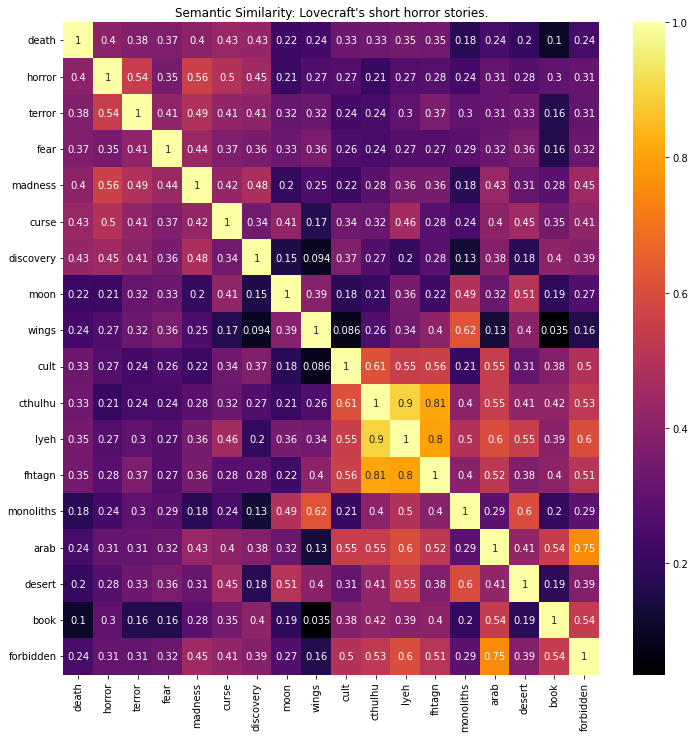

In [18]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]
    
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity: Lovecraft's short horror stories.")
            
words = [
    "death",
    "horror",
    "terror",
    "fear",
    "madness",
    "curse",
    "discovery",
    "moon",
    "wings",
    "cult",
    "cthulhu",
    "lyeh",
    "fhtagn",
    "monoliths",
    "arab",
    "desert",
    "book",
    "forbidden",
]
plot_similarities(words)